In [49]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [50]:
def method_random_endpoints(num_trials, radius=1):
    """
    Метод 1: случайные концы хорды
    Выбираем две случайные точки на окружности
    """
    count_longer = 0
    chord_lengths = []
    
    triangle_side = math.sqrt(3) * radius
    
    for _ in range(num_trials):
        angle1 = random.uniform(0, 2 * math.pi)
        angle2 = random.uniform(0, 2 * math.pi)
        
        x1, y1 = radius * math.cos(angle1), radius * math.sin(angle1)
        x2, y2 = radius * math.cos(angle2), radius * math.sin(angle2)
        
        chord_length = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        chord_lengths.append(chord_length)
        
        if chord_length > triangle_side:
            count_longer += 1
    
    probability = count_longer / num_trials
    return probability, chord_lengths

In [51]:
def method_random_radius(num_trials, radius=1):
    """
    Метод 2: случайный радиус
    Выбираем случайный радиус и точку на нем
    Проводим хорду перпендикулярно радиусу через эту точку
    """
    count_longer = 0
    chord_lengths = []
    
    triangle_side = math.sqrt(3) * radius
    
    for _ in range(num_trials):
        angle = random.uniform(0, 2 * math.pi)
        
        distance_from_center = random.uniform(0, radius)
        
        chord_length = 2 * math.sqrt(radius**2 - distance_from_center**2)
        chord_lengths.append(chord_length)
        
        if chord_length > triangle_side:
            count_longer += 1
    
    probability = count_longer / num_trials
    return probability, chord_lengths

In [52]:
def method_random_midpoint(num_trials, radius=1):
    """
    Метод 3: случайная середина хорды
    Выбираем случайную точку внутри круга (равномерно по площади)
    Проводим хорду, для которой эта точка - середина
    """
    count_longer = 0
    chord_lengths = []
    
    triangle_side = math.sqrt(3) * radius
    
    for _ in range(num_trials):
        angle = random.uniform(0, 2 * math.pi)
        
        r = radius * math.sqrt(random.random())
        
        # Координаты середины хорды
        x_mid = r * math.cos(angle)
        y_mid = r * math.sin(angle)
        
        chord_length = 2 * math.sqrt(radius**2 - r**2)
        chord_lengths.append(chord_length)
        
        if chord_length > triangle_side:
            count_longer += 1
    
    probability = count_longer / num_trials
    return probability, chord_lengths

In [53]:
def method_random_choice(num_trials, radius=1):
    """
    Метод 4: случайный выбор метода на каждой итерации
    На каждом испытании случайно выбирается один из трех методов
    """
    count_longer = 0
    chord_lengths = []
    method_counts = defaultdict(int)
    method_success_counts = defaultdict(int)
    
    triangle_side = math.sqrt(3) * radius
    
    for _ in range(num_trials):
        method = random.randint(1, 3)
        method_counts[method] += 1
        
        if method == 1:
            # Метод 1
            angle1 = random.uniform(0, 2 * math.pi)
            angle2 = random.uniform(0, 2 * math.pi)
            x1, y1 = radius * math.cos(angle1), radius * math.sin(angle1)
            x2, y2 = radius * math.cos(angle2), radius * math.sin(angle2)
            chord_length = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            
        elif method == 2:
            # Метод 2
            angle = random.uniform(0, 2 * math.pi)
            distance_from_center = random.uniform(0, radius)
            chord_length = 2 * math.sqrt(radius**2 - distance_from_center**2)
            
        else:
            # Метод 3
            angle = random.uniform(0, 2 * math.pi)
            r = radius * math.sqrt(random.random())
            chord_length = 2 * math.sqrt(radius**2 - r**2)
        
        chord_lengths.append(chord_length)
        
        if chord_length > triangle_side:
            count_longer += 1
            method_success_counts[method] += 1
    
    probability = count_longer / num_trials
    
    # Статистика по методам
    method_stats = {}
    for method in [1, 2, 3]:
        total = method_counts[method]
        successes = method_success_counts[method]
        method_stats[method] = {
            'count': total,
            'successes': successes,
            'probability': successes / total if total > 0 else 0
        }
    
    return probability, chord_lengths, method_stats

In [54]:
def simulate_bertrands_paradox(num_trials=100000):
    """
    Основная функция для симуляции парадокса Бертрана
    """
    print("=== Парадокс Бертрана: вероятность того, что случайная хорда длиннее стороны треугольника ===")
    print(f"Количество испытаний: {num_trials:,}")
    print(f"Длина стороны треугольника (радиус=1): {math.sqrt(3):.4f}")
    print()
    
    # Симуляция методов
    prob1, lengths1 = method_random_endpoints(num_trials)
    prob2, lengths2 = method_random_radius(num_trials)
    prob3, lengths3 = method_random_midpoint(num_trials)
    prob4, lengths4, method_stats = method_random_choice(num_trials)  # Случайный метод
    
    # Вывод результатов
    print("Метод 1 (случайные концы хорды):")
    print(f"  Полученная вероятность: {prob1:.4f}")
    print(f"  Теоретическая вероятность: {1/3:.4f}")
    print(f"  Отличие от теоретической: {abs(prob1 - 1/3):.6f}")
    print()
    
    print("Метод 2 (случайный радиус):")
    print(f"  Полученная вероятность: {prob2:.4f}")
    print(f"  Теоретическая вероятность: {1/2:.4f}")
    print(f"  Отличие от теоретической: {abs(prob2 - 1/2):.6f}")
    print()
    
    print("Метод 3 (случайная середина хорды):")
    print(f"  Полученная вероятность: {prob3:.4f}")
    print(f"  Теоретическая вероятность: {1/4:.4f}")
    print(f"  Отличие от теоретической: {abs(prob3 - 1/4):.6f}")
    print()
    
    print("Метод 4 (случайный выбор метода на каждой итерации):")
    print(f"  Общая вероятность: {prob4:.4f}")
    print(f"  Теоретическое ожидание (среднее 3 методов): {((1/3)+(1/2)+(1/4))/3:.4f}")
    print(f"  Отличие от ожидаемого среднего: {abs(prob4 - ((1/3)+(1/2)+(1/4))/3):.6f}")
    print()
    
    # Статистика по методам в случайном выборе
    print("Статистика случайного выбора методов:")
    for method in [1, 2, 3]:
        stats = method_stats[method]
        method_name = ["случайные концы", "случайный радиус", "случайная середина"][method-1]
        print(f"  Метод {method} ({method_name}):")
        print(f"    Количество использований: {stats['count']} ({stats['count']/num_trials*100:.1f}%)")
        print(f"    Успешных случаев: {stats['successes']}")
        print(f"    Вероятность успеха: {stats['probability']:.4f}")
    
    # Визуализация
    visualize_results(lengths1, lengths2, lengths3, lengths4, math.sqrt(3), prob1, prob2, prob3, prob4, method_stats)

In [55]:
def visualize_results(lengths1, lengths2, lengths3, lengths4, triangle_side, prob1, prob2, prob3, prob4, method_stats):
    """
    Визуализация распределений длин хорд для четырех методов
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # Гистограмма для метода 1
    axes[0, 0].hist(lengths1, bins=50, alpha=0.7, density=True)
    axes[0, 0].axvline(triangle_side, color='red', linestyle='--', label=f'Сторона треугольника: {triangle_side:.3f}')
    axes[0, 0].set_xlabel('Длина хорды')
    axes[0, 0].set_ylabel('Плотность')
    axes[0, 0].set_title(f'Метод 1: Случайные концы\nВероятность: {prob1:.4f}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Гистограмма для метода 2
    axes[0, 1].hist(lengths2, bins=50, alpha=0.7, density=True, color='green')
    axes[0, 1].axvline(triangle_side, color='red', linestyle='--', label=f'Сторона треугольника: {triangle_side:.3f}')
    axes[0, 1].set_xlabel('Длина хорды')
    axes[0, 1].set_title(f'Метод 2: Случайный радиус\nВероятность: {prob2:.4f}')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Гистограмма для метода 3
    axes[1, 0].hist(lengths3, bins=50, alpha=0.7, density=True, color='purple')
    axes[1, 0].axvline(triangle_side, color='red', linestyle='--', label=f'Сторона треугольника: {triangle_side:.3f}')
    axes[1, 0].set_xlabel('Длина хорды')
    axes[1, 0].set_title(f'Метод 3: Случайная середина\nВероятность: {prob3:.4f}')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Гистограмма для метода 4
    axes[1, 1].hist(lengths4, bins=50, alpha=0.7, density=True, color='orange')
    axes[1, 1].axvline(triangle_side, color='red', linestyle='--', label=f'Сторона треугольника: {triangle_side:.3f}')
    axes[1, 1].set_xlabel('Длина хорды')
    axes[1, 1].set_title(f'Метод 4: Случайный выбор метода\nВероятность: {prob4:.4f}')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.suptitle('Распределение длин хорд для разных методов выбора', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Визуализация
    methods = ['Метод 1\n(случайные концы)', 'Метод 2\n(случайный радиус)', 'Метод 3\n(случайная середина)', 'Метод 4\n(случайный метод)']
    theoretical_probs = [1/3, 1/2, 1/4, ((1/3)+(1/2)+(1/4))/3]
    empirical_probs = [prob1, prob2, prob3, prob4]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    x_pos = np.arange(len(methods))
    width = 0.35
    
    ax.bar(x_pos - width/2, theoretical_probs, width, label='Теоретическая вероятность', alpha=0.8)
    
    ax.bar(x_pos + width/2, empirical_probs, width, label=f'Эмпирическая вероятность\n({len(lengths1):,} испытаний)', alpha=0.8)
    
    ax.set_ylabel('Вероятность')
    ax.set_title('Сравнение теоретических и эмпирических вероятностей')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(methods)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3, axis='y')
    
    for i, (theoretical, empirical) in enumerate(zip(theoretical_probs, empirical_probs)):
        ax.text(i - width/2, theoretical + 0.01, f'{theoretical:.4f}', ha='center', va='bottom')
        ax.text(i + width/2, empirical + 0.01, f'{empirical:.4f}', ha='center', va='bottom')
    
    ax.text(len(methods)/2 - 0.5, max(theoretical_probs) + 0.05, 
            'ПАРАДОКС: Один и тот же вопрос имеет разные ответы в зависимости от интерпретации "случайной" хорды',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='darkred',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    method_labels = ['Случайные концы', 'Случайный радиус', 'Случайная середина']
    method_colors = ['blue', 'green', 'purple']
    
    counts = [method_stats[1]['count'], method_stats[2]['count'], method_stats[3]['count']]
    successes = [method_stats[1]['successes'], method_stats[2]['successes'], method_stats[3]['successes']]
    
    x = np.arange(len(method_labels))
    width = 0.35
    
    ax.bar(x - width/2, counts, width, label='Количество использований', color=method_colors, alpha=0.6)
    ax.bar(x + width/2, successes, width, label='Успешные случаи', color=method_colors, alpha=0.9)
    
    ax.set_xlabel('Метод')
    ax.set_ylabel('Количество')
    ax.set_title('Статистика случайного выбора методов')
    ax.set_xticks(x)
    ax.set_xticklabels(method_labels)
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    for i, (count, success) in enumerate(zip(counts, successes)):
        ax.text(i - width/2, count + max(counts)*0.01, f'{count}', ha='center', va='bottom')
        ax.text(i + width/2, success + max(counts)*0.01, f'{success}', ha='center', va='bottom')
        ax.text(i, -max(counts)*0.1, f'{success/count*100:.1f}% успеха', ha='center', va='top')
    
    plt.tight_layout()
    plt.show()

=== Парадокс Бертрана: вероятность того, что случайная хорда длиннее стороны треугольника ===
Количество испытаний: 100,000
Длина стороны треугольника (радиус=1): 1.7321

Метод 1 (случайные концы хорды):
  Полученная вероятность: 0.3309
  Теоретическая вероятность: 0.3333
  Отличие от теоретической: 0.002403

Метод 2 (случайный радиус):
  Полученная вероятность: 0.4998
  Теоретическая вероятность: 0.5000
  Отличие от теоретической: 0.000200

Метод 3 (случайная середина хорды):
  Полученная вероятность: 0.2490
  Теоретическая вероятность: 0.2500
  Отличие от теоретической: 0.001020

Метод 4 (случайный выбор метода на каждой итерации):
  Общая вероятность: 0.3604
  Теоретическое ожидание (среднее 3 методов): 0.3611
  Отличие от ожидаемого среднего: 0.000721

Статистика случайного выбора методов:
  Метод 1 (случайные концы):
    Количество использований: 33263 (33.3%)
    Успешных случаев: 11135
    Вероятность успеха: 0.3348
  Метод 2 (случайный радиус):
    Количество использований: 332

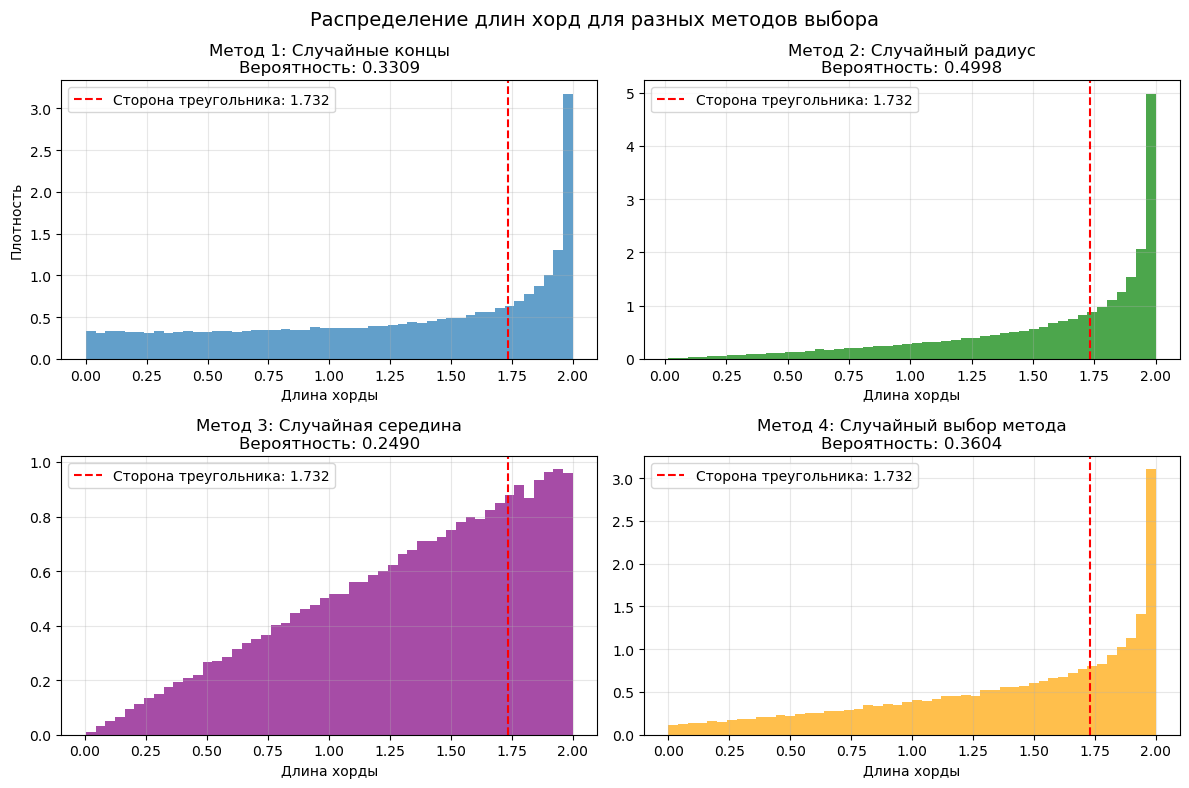

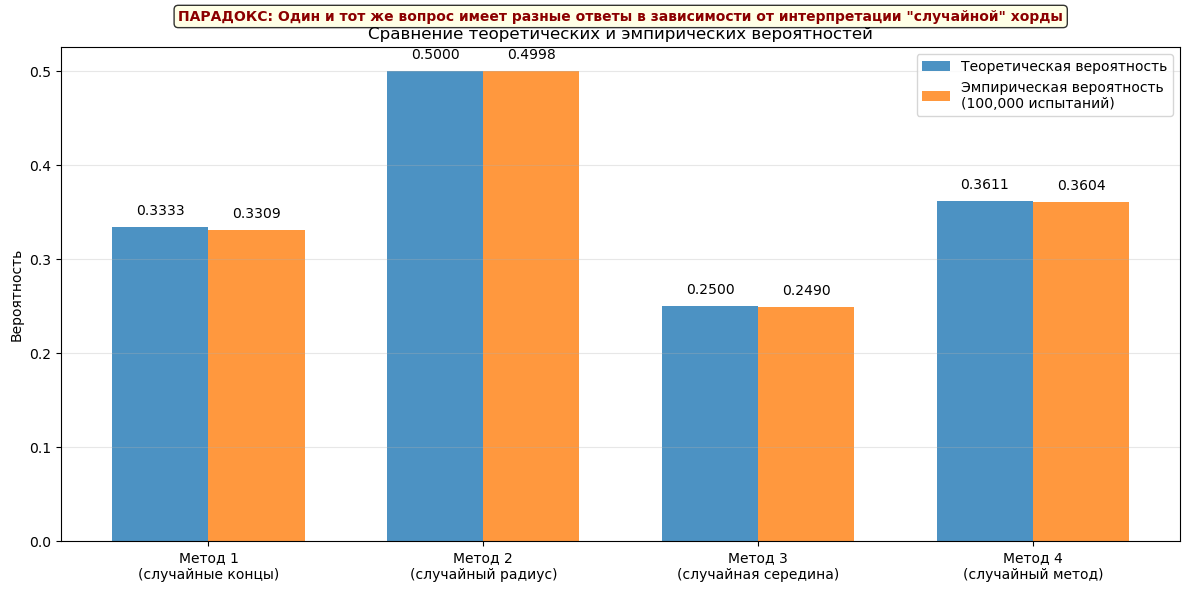

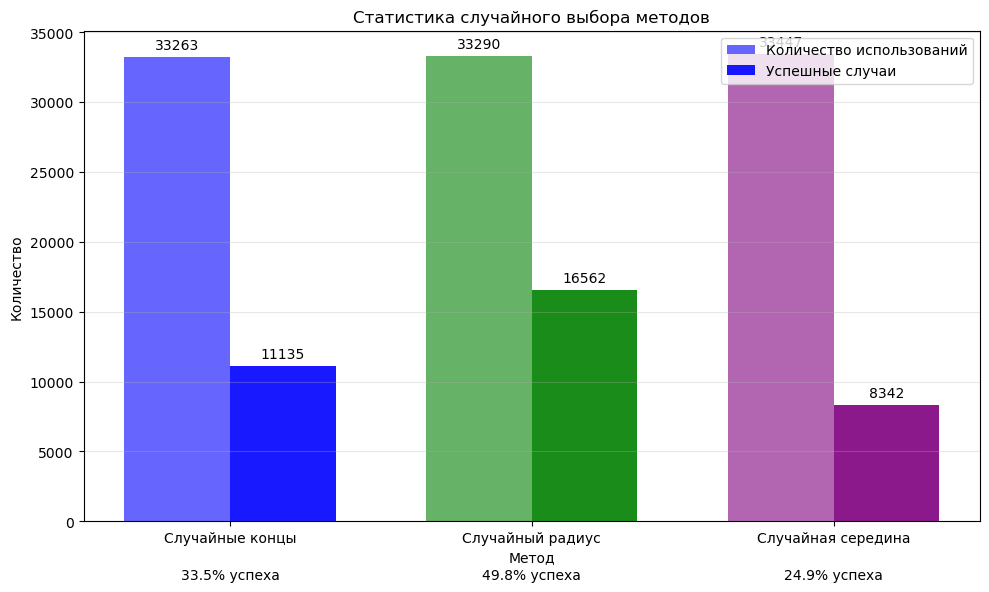

In [56]:
simulate_bertrands_paradox(100000)